In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Laden des Datensatzes
data = pd.read_csv('fake_job_postings.csv')

In [3]:
# fülle alle leeren Werte mit einem Leerstring
data = data.fillna('')

In [4]:
# Vektorisierung des Texts
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(data['description'])

CountVectorizer(stop_words='english')

In [5]:
X = vectorizer.transform(data['description'])
y = data['fraudulent']

In [6]:
# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.toarray().shape

(14304, 61934)

In [33]:
# Erstellung des Modells
model = Sequential()

# Erste Schicht
model.add(Dense(512, input_shape=(len(vectorizer.get_feature_names()),), activation='relu'))

# Dropout-Schicht
model.add(Dropout(0.5))

# Zweite Schicht
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Ausgabeschicht
model.add(Dense(1, activation='sigmoid'))

C:\Users\Startklar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Training des Modells
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

447/447 [==============================] - 109s 244ms/step - loss: 0.0617 - accuracy: 0.9827 - val_loss: 0.1172 - val_accuracy: 0.9768
Epoch 3/10
447/447 [==============================] - 116s 259ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.2481 - val_accuracy: 0.9773
Epoch 4/10
447/447 [==============================] - 106s 237ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.1922 - val_accuracy: 0.9785
Epoch 5/10
447/447 [==============================] - 103s 230ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.2037 - val_accuracy: 0.9796
Epoch 6/10
447/447 [==============================] - 114s 255ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.2858 - val_accuracy: 0.9804
Epoch 7/10
447/447 [==============================] - 126s 281ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.2450 - val_accuracy: 0.9801
Epoch 8/10
447/447 [==============================] - 123s 275ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.2736 - val_accura

Epoch 1/10
447/447 [==============================] - 128s 281ms/step - loss: 0.1623 - accuracy: 0.9637 - val_loss: 0.1061 - val_accuracy: 0.9751
Epoch 2/10
447/447 [==============================] - 124s 276ms/step - loss: 0.0610 - accuracy: 0.9832 - val_loss: 0.1346 - val_accuracy: 0.9776
Epoch 3/10
447/447 [==============================] - 130s 291ms/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.1940 - val_accuracy: 0.9776
Epoch 4/10
447/447 [==============================] - 117s 262ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.2065 - val_accuracy: 0.9799
Epoch 5/10
447/447 [==============================] - 123s 275ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.2193 - val_accuracy: 0.9796
Epoch 6/10
447/447 [==============================] - 126s 278ms/step - loss: 0.0118 - accuracy: 0.9987 - val_loss: 0.2561 - val_accuracy: 0.9790
Epoch 7/10
447/447 [==============================] - 123s 275ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.2107 -

In [36]:
# Bewertung des Modells
score, acc = model.evaluate(X_test.toarray(), y_test, batch_size=32)

112/112 [==============================] - 7s 59ms/step - loss: 0.2758 - accuracy: 0.9793


In [37]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.27584415674209595
Test accuracy: 0.9793064594268799


112/112 [==============================] - 2s 20ms/step


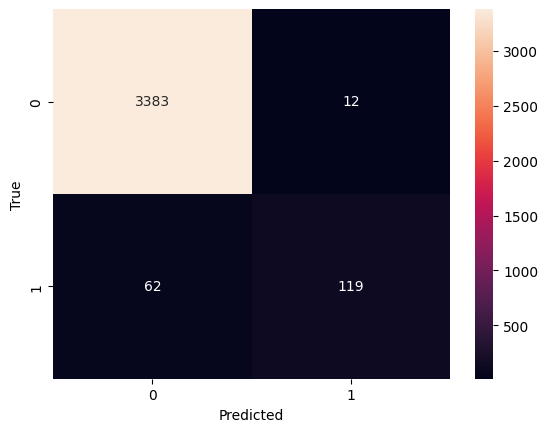

In [39]:
# Klassifikationsmatrix plotten

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test.toarray())
y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
#achsen
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
